In [10]:
import pandas as pd

# Substitua pelo caminho correto do arquivo CSV
file_path = 'C:\\Users\\rhuan\\Downloads\\archive\\Economy_Data_95_GDP_per_capita__PPP__constant_2017_international___.csv'

# Carregar o arquivo CSV no Pandas DataFrame
df = pd.read_csv(file_path, sep=';', header=0)

# Exibir as primeiras 5 linhas para ver a estrutura dos dados
df.head()


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,Brazil,BRA,1970.0,NaN
1,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,China,CHN,1970.0,NaN
2,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,India,IND,1970.0,NaN
3,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,Russian Federation,RUS,1970.0,NaN
4,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,South Africa,ZAF,1970.0,NaN


In [11]:
# Exibir os nomes das colunas
print(df.columns)

# Exibir informações gerais sobre o DataFrame (tipos de dados, valores nulos, etc.)
df.info()

# Exibir as estatísticas descritivas dos dados numéricos
df.describe()


Index(['SeriesName', 'SeriesCode', 'CountryName', 'CountryCode', 'Year',
       'Value'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   250 non-null    object 
 1   SeriesCode   250 non-null    object 
 2   CountryName  250 non-null    object 
 3   CountryCode  250 non-null    object 
 4   Year         250 non-null    float64
 5   Value        150 non-null    float64
dtypes: float64(2), object(4)
memory usage: 11.8+ KB


,Year,Value
count,250.000000,150.000000
mean,1994.500000,10930.575230
std,14.459818,6620.446456
min,1970.000000,1423.702212
25%,1982.000000,4811.518884
50%,1994.500000,11259.790356
75%,2007.000000,14072.178634
max,2019.000000,27043.935389


In [12]:
# Verificando quantos valores ausentes existem em cada coluna
df.isnull().sum()

SeriesName       0
SeriesCode       0
CountryName      0
CountryCode      0
Year             0
Value          100
dtype: int64

In [14]:
# Removendo linhas onde a coluna ' Value' tem valores ausentes
df_clean = df.dropna(subset=['Value'])

# Verificar o número de linhas restantes após a remoção
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 100 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   150 non-null    object 
 1   SeriesCode   150 non-null    object 
 2   CountryName  150 non-null    object 
 3   CountryCode  150 non-null    object 
 4   Year         150 non-null    float64
 5   Value        150 non-null    float64
dtypes: float64(2), object(4)
memory usage: 8.2+ KB


In [15]:
# Renomear as colunas para nomes mais simples
df_clean = df_clean.rename(columns={
    'SeriesName': 'Série',
    'SeriesCode': 'Código',
    'CountryName': 'País',
    'CountryCode': 'Código_País',
    'Year': 'Ano',
    'Value': 'PIB_Per_Capita'
})

# Exibir as primeiras linhas para confirmar
df_clean.head()

,Série,Código,País,Código_País,Ano,PIB_Per_Capita
100,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,Brazil,BRA,1990.0,10517.670287
101,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,China,CHN,1990.0,1423.702212
102,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,India,IND,1990.0,1809.802205
103,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,Russian Federation,RUS,1990.0,21548.652237
104,"GDP per capita, PPP (constant 2017 internation...",NY.GDP.PCAP.PP.KD,South Africa,ZAF,1990.0,10296.440284


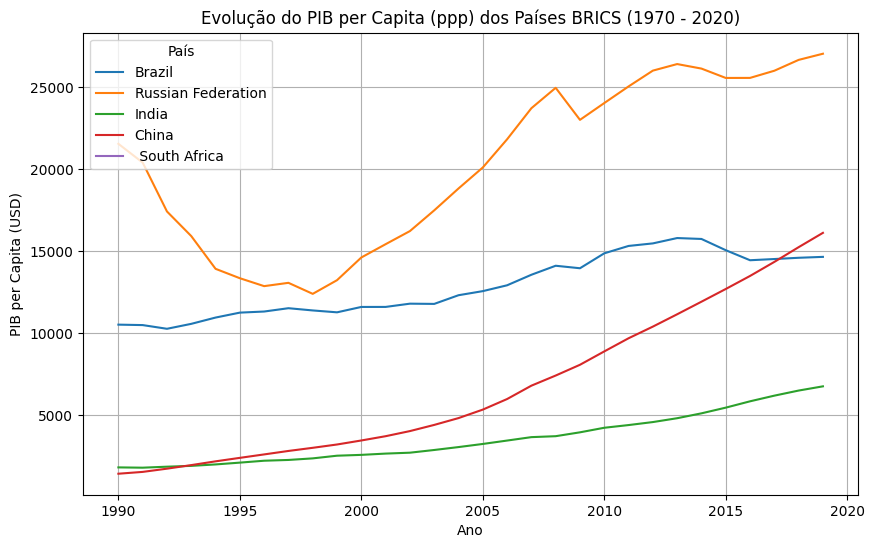

In [28]:
import matplotlib.pyplot as plt

# Filtrando os dados para os paóses do BRICS
brics_countries = ['Brazil', 'Russian Federation', 'India', 'China', ' South Africa']
df_brics = df_clean [df_clean['País'].isin(brics_countries)]

#Criando gráfico de linha para cada país, mostrando a evolução do pib per capita
plt.figure(figsize=(10,6))

for country in brics_countries:
    country_data = df_brics[df_brics['País'] == country]
    plt.plot(country_data['Ano'], country_data['PIB_Per_Capita'], label=country)

#Títulos e legendas
plt.title('Evolução do PIB per Capita (ppp) dos Países BRICS (1970 - 2020)')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita (USD)')
plt.legend(title="País")
plt.grid(True)
plt.show()

In [25]:
pib_medio_por_pais = df_clean.groupby('País')['PIB_Per_Capita'].mean().sort_values(ascending=False)

pib_medio_por_pais

País
Russian Federation    20294.080136
Brazil                12873.471534
South Africa          11243.091570
China                  6691.849140
India                  3550.383771
Name: PIB_Per_Capita, dtype: float64

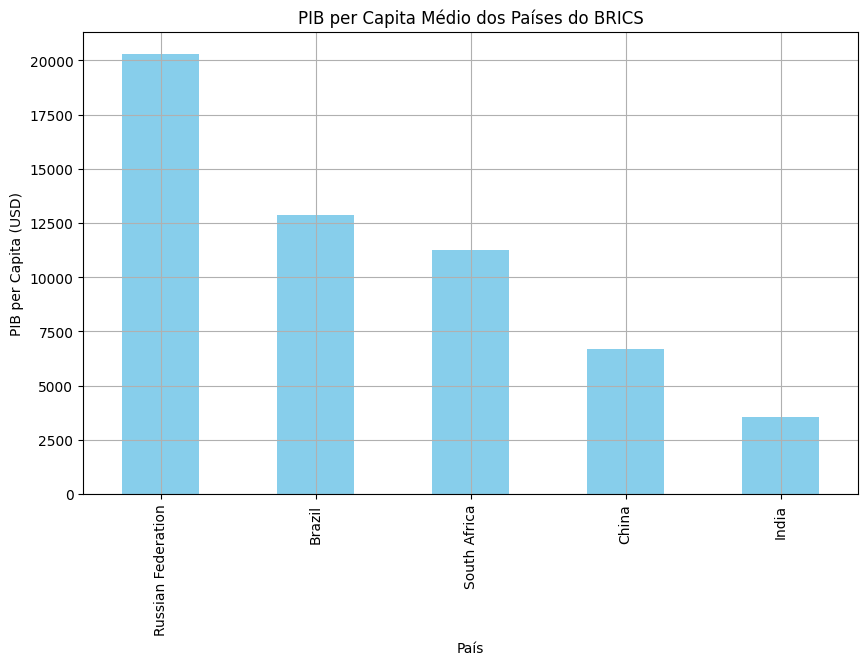

In [26]:
# Criando gráfico de barras para o PIB per Capita médio de cada País

plt.figure(figsize=(10,6))
pib_medio_por_pais.plot(kind='bar', color='skyblue')

# Rótulos

plt.title('PIB per Capita Médio dos Países do BRICS')
plt.ylabel('PIB per Capita (USD)')
plt.xlabel('País')
plt.grid(True)
plt.show()

In [29]:
# Maior crescimento: China
# Rússia teve uma queda significativa durante a década de 90, devido ao fim da URSS
#

In [30]:
# Calcular o PIB per capita médio antes e depois do ano 2000

pib_antes_2000 = df_clean[df_clean['Ano'] > 2000].groupby('País')['PIB_Per_Capita'].mean()
pib_depois_2000 = df_clean[df_clean['Ano'] >= 2000].groupby('País')['PIB_Per_Capita'].mean()

pib_antes_2000, 

(País
 Brazil                13951.414011
 China                  9182.521690
 India                  4375.020652
 Russian Federation    23162.280561
 South Africa          12102.482733
 Name: PIB_Per_Capita, dtype: float64,
 País
 Brazil                13833.700478
 China                  8895.982309
 India                  4284.962145
 Russian Federation    22734.898220
 South Africa          12001.801265
 Name: PIB_Per_Capita, dtype: float64)

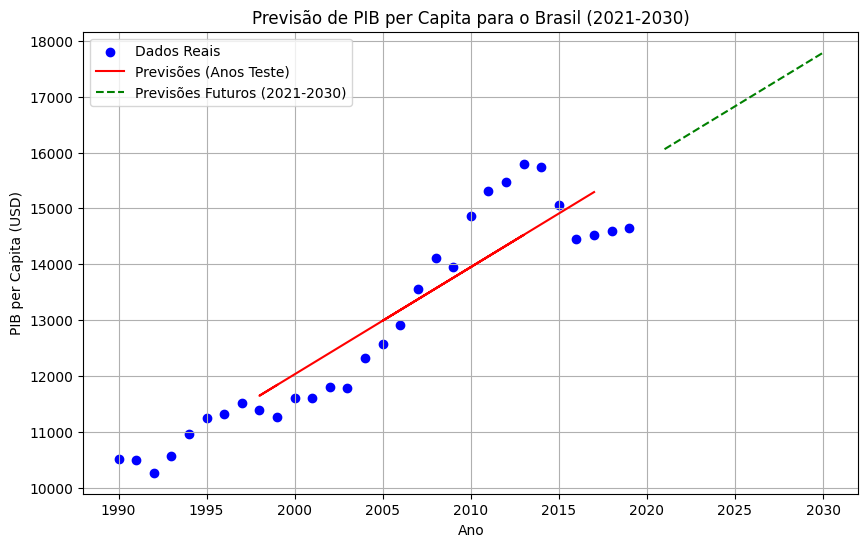

In [35]:
import numpy as np

# Gerar anos futuros (2021 a 2030) com o mesmo formato que usamos anteriormente
anos_futuros = pd.DataFrame(np.arange(2021, 2031), columns=['Ano'])

# Fazer previsões para esses anos futuros
previsoes_futuras = model.predict(anos_futuros)

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))

# Plotar os dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar as previsões para os anos de teste
plt.plot(X_test, y_pred, color='red', label='Previsões (Anos Teste)')

# Plotar as previsões para os anos futuros
plt.plot(anos_futuros, previsoes_futuras, color='green', linestyle='--', label='Previsões Futuros (2021-2030)')

# Configurações do gráfico
plt.title('Previsão de PIB per Capita para o Brasil (2021-2030)')
plt.xlabel('Ano')
plt.ylabel('PIB per Capita (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calcular o R² para os dados de teste
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")


R²: 0.82
Erro Absoluto Médio (MAE): 581.73
Raiz do Erro Quadrático Médio (RMSE): 686.90


In [38]:
import plotly.express as px

# Criando gráfico interativo de linha para evolução do PIB per capita utilizando plotly
fig = px.line(df_clean[df_clean['País'] == 'Brazil'], 
              x='Ano', 
              y='PIB_Per_Capita', 
              title='Evolução do PIB per Capita do Brasil (PPP)',
              labels={'PIB_Per_Capita': 'PIB per Capita (USD)', 'Ano': 'Ano'})

# Exibir o gráfico interativo
fig.show()


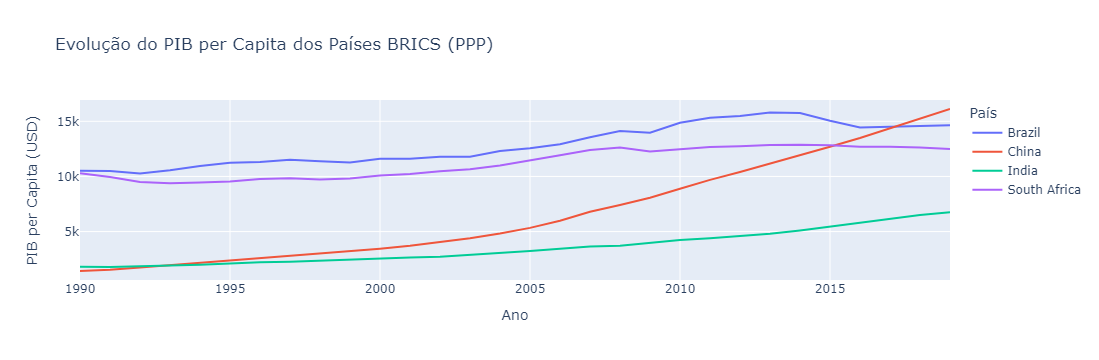

In [39]:
# gráfico interativo de linha para evolução do PIB per capita de todos os BRICS
fig = px.line(df_clean[df_clean['País'].isin(['Brazil', 'Russia', 'India', 'China', 'South Africa'])], 
              x='Ano', 
              y='PIB_Per_Capita', 
              color='País', 
              title='Evolução do PIB per Capita dos Países BRICS (PPP)',
              labels={'PIB_Per_Capita': 'PIB per Capita (USD)', 'Ano': 'Ano'})

# Exibindo o gráfico interativo
fig.show()


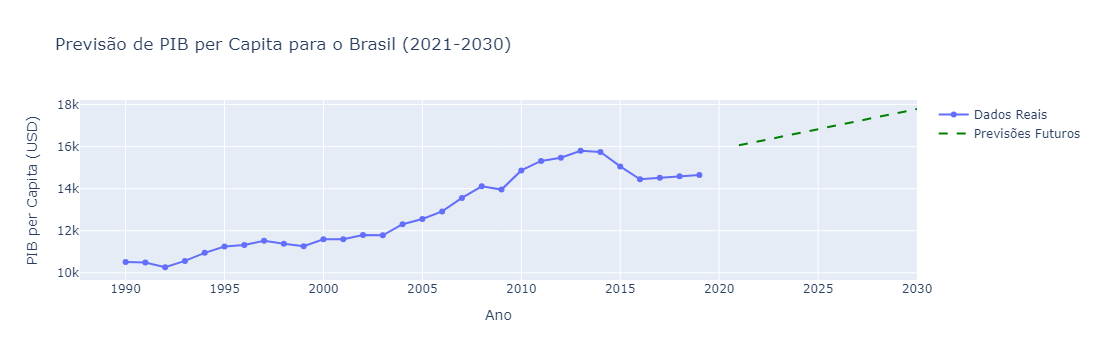

In [40]:
import plotly.graph_objects as go

# Gráfico dos dados reais
fig = go.Figure()

# Dados reais
fig.add_trace(go.Scatter(x=df_clean[df_clean['País'] == 'Brazil']['Ano'], 
                         y=df_clean[df_clean['País'] == 'Brazil']['PIB_Per_Capita'],
                         mode='lines+markers',
                         name='Dados Reais'))

# Previsões futuras
fig.add_trace(go.Scatter(x=anos_futuros['Ano'], 
                         y=previsoes_futuras, 
                         mode='lines',
                         line=dict(dash='dash', color='green'),
                         name='Previsões Futuros'))

# Ajustar títulos e eixos
fig.update_layout(title='Previsão de PIB per Capita para o Brasil (2021-2030)',
                  xaxis_title='Ano',
                  yaxis_title='PIB per Capita (USD)')

# Exibir o gráfico
fig.show()


In [52]:
# Importando bibliotecas necessárias
from dash import dcc, html, Dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go

# Inicializar a aplicação usando Dash
app = Dash(__name__)

# Layout do Dashboard
app.layout = html.Div([
    html.H1("Dashboard de PIB per Capita dos BRICS com Previsões Futuras"),
    
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in brics_countries],
        value='Brazil',  # Valor inicial
        clearable=False
    ),
    
    dcc.Graph(id='pib-graph'),

    html.Div(id='pib-medio-texto', style={'margin-top': '20px', 'font-size': '20px'})
])

# Callback para atualizar o gráfico e o texto com base no país selecionado
@app.callback(
    [Output('pib-graph', 'figure'),
     Output('pib-medio-texto', 'children')],
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    # Filtrar os dados reais
    country_data = df_clean[df_clean['País'] == selected_country]

    # Previsões para anos futuros
    if selected_country == 'Brazil':
        # Previsões específicas para o Brasil (você pode adaptar para outros países)
        anos_futuros = pd.DataFrame(np.arange(2021, 2031), columns=['Ano'])
        previsoes_futuras = model.predict(anos_futuros)

    # Criar o gráfico com os dados reais e previsões futuras
    fig = go.Figure()

    # Adicionar os dados reais
    fig.add_trace(go.Scatter(x=country_data['Ano'], 
                             y=country_data['PIB_Per_Capita'],
                             mode='lines+markers',
                             name='Dados Reais'))
    
    # Adicionar previsões futuras
    if selected_country == 'Brazil':
        fig.add_trace(go.Scatter(x=anos_futuros['Ano'], 
                                 y=previsoes_futuras, 
                                 mode='lines',
                                 line=dict(dash='dash', color='green'),
                                 name='Previsões Futuros (2021-2030)'))

    # Ajustar o layout do gráfico
    fig.update_layout(title=f'Evolução do PIB per Capita - {selected_country} com Previsões',
                      xaxis_title='Ano',
                      yaxis_title='PIB per Capita (USD)')
    
    # Calcular o PIB per capita médio do país selecionado
    pib_medio = country_data['PIB_Per_Capita'].mean()
    texto_pib_medio = f"PIB per Capita médio: {pib_medio:.2f} USD"
    
    return fig, texto_pib_medio

# Rodar no navegador
app.run_server(debug=True)
